<a href="https://colab.research.google.com/github/iam-smjamilsagar/Deep-Learning-basics-with-Python-TensorFlow-and-Keras/blob/main/TensorFlow%2C_and_Keras_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.keras as keras      # Keras included with TensorFlow
import tensorflow as tf               # I am going to be using TensorFlow version 1.10
# we can figure out the version by print(tf.__version__)
# mnist dataset is a dataset of hand-written digits, 0 through 9. It's 28x28 images of these hand-written digits.
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

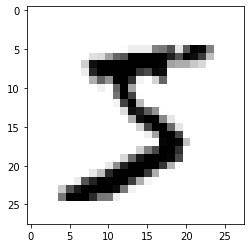

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

x_train = tf.keras.utils.normalize(x_train, axis=1) 
x_test = tf.keras.utils.normalize(x_test, axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

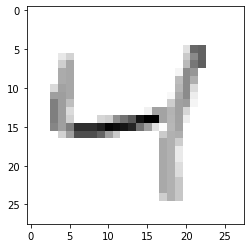

In [ ]:
print(x_train[2])

plt.imshow(x_train[2],cmap=plt.cm.binary)
plt.show()

In [ ]:
model = tf.keras.models.Sequential() # a basic feed-forward model
model.add(tf.keras.layers.Flatten()) # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # our output layer. 10 units for 10 classes. Softmax for probability distribution
model.compile(optimizer='adam', # Good default optimizer to start with
              loss='sparse_categorical_crossentropy', # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track 
model.fit(x_train, y_train, epochs=4) # train the model

Epoch 1/4
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4589 - accuracy: 0.8705
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1101 - accuracy: 0.9665
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0714 - accuracy: 0.9776
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0494 - accuracy: 0.9842


In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test) # evaluate the out of sample data with model
print(val_loss) # model's loss (error)
print(val_acc) # model's accuracy

313/313 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 0.9704
0.09367840737104416
0.9703999757766724


In [ ]:
model.save('num_reader.model') # saving the model to the directory

INFO:tensorflow:Assets written to: num_reader.model/assets


In [ ]:
new_model = tf.keras.models.load_model('num_reader.model') # loading the model from the directory

In [ ]:
predictions = new_model.predict(x_test) # making predictions
print(predictions) # printing the predictions

[[3.0440699e-11 2.3369595e-10 4.0686150e-08 ... 9.9999976e-01
  7.4816327e-11 6.4185666e-09]
 [5.9048533e-10 9.5803198e-06 9.9998844e-01 ... 4.0688810e-11
  3.9282209e-08 2.2949267e-13]
 [3.9062158e-07 9.9961662e-01 9.9505160e-06 ... 4.2665597e-05
  3.0836434e-04 6.2561497e-07]
 ...
 [2.0946057e-08 7.7944742e-06 5.4512832e-08 ... 3.4267866e-04
  8.3256586e-05 1.6873331e-04]
 [5.9523672e-06 3.7342772e-07 3.0060610e-09 ... 2.4643928e-06
  2.5068768e-05 1.0448886e-08]
 [7.7555509e-09 2.4484664e-10 1.3364699e-09 ... 2.6821757e-12
  6.5299695e-09 6.1828248e-10]]


In [ ]:
import numpy as np

print(np.argmax(predictions[2])) # printing the predictions with numpy to understand clearly

1


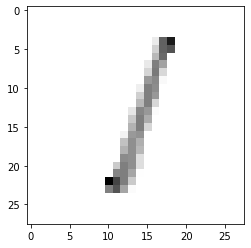

In [ ]:
plt.imshow(x_test[2],cmap=plt.cm.binary) # calling the data and checking whether the prediction is right or wrong
plt.show()